<a href="https://colab.research.google.com/github/slapazromero/Coches_net/blob/main/Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importación de librerias.

In [1]:
import pandas as pd
import numpy as np

from google.colab import files
import io

import os
import csv
import json

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importación de datos

In [2]:
#funciones para la obtención de columnas con valores nulos
def columns_without_values(data):
    columns = data.isnull().sum()
    print(columns[columns > 0])

#funciones para obtener la representación de los diagramas de cajas
def draw_hist_boxplot(df, feature_name):
    sns.boxplot(x=feature_name, data=df)
    sns.stripplot(x=feature_name, data=df, color="#474646")

#funciones que se utilizan para 'corregir' valores atípicos
def replace_outliers_with_median(df, feature_name):
    Q1 = df[feature_name].quantile(0.25)
    median = df[feature_name].quantile(0.5)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[feature_name] = np.where((df[feature_name] < lower_whisker) | 
                                (df[feature_name] > upper_whisker), 
                                 median, 
                                 df[feature_name])

In [3]:
# data = ...
data = None

In [4]:
def read_file(filename):
  if filename.endswith(".json"):
    df = pd.read_json(filename, encoding='utf-8')
  elif filename.endswith(".csv"):
    df = pd.read_csv(filename, encoding='utf-8')
  else:
    print("El archivo no es valido.")
    return None
    
  return df

def format_file(df):
  return df.drop('resto_de_datos', axis=1).join(pd.json_normalize(df['resto_de_datos']).drop('url', axis=1))

In [5]:
def create_dataframe(data, filename):
  df = read_file(filename)
  if 'resto_de_datos' in df:
    df = format_file(df)
  if data is None or data.empty:
    data = df
  else:
    data = pd.concat([data, df], ignore_index=True)
  return data

In [6]:
folder_path = "/content/"

for filename in os.listdir(folder_path):
  full_path = os.path.join(folder_path, filename)
  if os.path.isfile(full_path):
    print(full_path)
    data = create_dataframe(data, full_path)

/content/16.csv
/content/01.json
/content/17.csv
/content/04.json
/content/11.json
/content/05.json
/content/06.json
/content/03.json
/content/14.json
/content/12.json
/content/08.json
/content/07.json
/content/10.json
/content/02.json
/content/13.json
/content/09.json
/content/15.json


In [7]:
df = data

Obtener información acerca de los datos que se acaban de leer.

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df

,Unnamed: 0,fuelType,fuelTypeId,color,id,km,make,makeId,model,modelId,...,url,date,datetime,brand,brand_id,fuel_types,model_id,bodyType,publicationDate,fecha
0,0.0,Diésel,1.0,COMMON.COLOR_BLACK,53501300.0,170000.0,BMW,7.0,X3,515.0,...,https://www.coches.net/bmw-x3-sdrive18d-diesel...,2023-04-08 21:24:06,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Diésel,1.0,COMMON.COLOR_WHITE,54722839.0,88000.0,BMW,7.0,Serie 5,71.0,...,https://www.coches.net/bmw-serie-5-520da-touri...,2023-04-08 21:24:14,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Diésel,1.0,COMMON.COLOR_BLACK,54738428.0,74500.0,BMW,7.0,X5,438.0,...,https://www.coches.net/bmw-x5-xdrive30d-5p-die...,2023-04-08 21:24:16,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Gasolina,2.0,COMMON.COLOR_BLUE,54594808.0,39956.0,BMW,7.0,Serie 1,539.0,...,https://www.coches.net/bmw-serie-1-118i-corpor...,2023-04-08 21:24:18,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Diésel,1.0,COMMON.COLOR_BLACK,53851852.0,96267.0,BMW,7.0,Serie 2 Gran Tourer,1159.0,...,https://www.coches.net/bmw-serie-2-gran-tourer...,2023-04-08 21:24:20,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13854,NaN,Eléctrico,3.0,COMMON.COLOR_BLACK,54767364,129000.0,TESLA,1354.0,Model S,1171.0,...,https://www.coches.net/tesla-model-s-75d-4wd-5...,NaN,NaT,TESLA,1354.0,Eléctrico,1171.0,BODY_TYPE_SEDAN,NaN,NaN
13855,NaN,Eléctrico,3.0,COMMON.COLOR_WHITE,54858044,175000.0,TESLA,1354.0,Model X,1172.0,...,https://www.coches.net/tesla-model-x-90d-4wd-e...,NaN,NaT,TESLA,1354.0,Eléctrico,1172.0,BODY_TYPE_4X4,NaN,NaN
13856,NaN,Eléctrico,3.0,COMMON.COLOR_WHITE,54039041,77000.0,TESLA,1354.0,Model 3,1262.0,...,https://www.coches.net/tesla-model-3-performan...,NaN,NaT,TESLA,1354.0,Eléctrico,1262.0,BODY_TYPE_SEDAN,NaN,NaN
13857,NaN,Eléctrico,3.0,COMMON.COLOR_WHITE,54039033,33000.0,TESLA,1354.0,Model 3,1262.0,...,https://www.coches.net/tesla-model-3-gran-auto...,NaN,NaT,TESLA,1354.0,Eléctrico,1262.0,BODY_TYPE_SEDAN,NaN,NaN


In [10]:
df.dtypes

Unnamed: 0                   float64
fuelType                      object
fuelTypeId                   float64
color                         object
id                            object
km                           float64
make                          object
makeId                       float64
model                         object
modelId                      float64
province                      object
provinceId                   float64
price                        float64
title                         object
transmissionType              object
transmissionTypeId           float64
year                         float64
seller_type                   object
seller_type_id               float64
body_types                    object
body_types_id                float64
cubicCapacity                float64
doors                        float64
hp                           float64
url                           object
date                          object
datetime              datetime64[ns]
b

In [11]:
df.describe()

,Unnamed: 0,fuelTypeId,km,makeId,modelId,provinceId,price,transmissionTypeId,year,seller_type_id,body_types_id,cubicCapacity,doors,hp,brand_id,model_id
count,2014.000000,13853.000000,13853.000000,13853.000000,13842.00000,13853.000000,13853.000000,13850.000000,13853.000000,2008.000000,1965.000000,13383.000000,13842.000000,13614.000000,10807.000000,10798.000000
mean,1006.500000,1.698405,73631.588826,67.421281,700.10013,26.791092,24692.173609,1.591119,2018.188190,1.095120,4.040712,1697.940596,4.770770,149.978772,82.903581,688.657159
std,581.536041,0.986918,42334.050002,215.144161,432.62635,13.817296,18407.759898,0.491645,2.347429,0.293453,2.296586,553.938153,0.645753,76.239499,241.278013,440.288107
min,0.000000,1.000000,10000.000000,1.000000,2.00000,1.000000,4000.000000,1.000000,2012.000000,1.000000,1.000000,647.000000,2.000000,60.000000,1.000000,2.000000
25%,503.250000,1.000000,38700.000000,15.000000,345.00000,14.000000,15700.000000,1.000000,2017.000000,1.000000,1.000000,1395.000000,5.000000,110.000000,22.000000,275.000000
50%,1006.500000,1.000000,68408.000000,28.000000,678.00000,28.000000,20900.000000,2.000000,2018.000000,1.000000,6.000000,1596.000000,5.000000,130.000000,32.000000,628.000000
75%,1509.750000,2.000000,100712.000000,35.000000,1097.00000,38.000000,27990.000000,2.000000,2020.000000,1.000000,6.000000,1995.000000,5.000000,160.000000,40.000000,1100.000000
max,2013.000000,7.000000,180000.000000,1400.000000,1442.00000,52.000000,450000.000000,2.000000,2022.000000,2.000000,6.000000,6496.000000,5.000000,800.000000,1400.000000,1442.000000


# 3. Preparación de datos.

In [12]:
pd.isnull(df).any()

Unnamed: 0             True
fuelType               True
fuelTypeId             True
color                  True
id                     True
km                     True
make                   True
makeId                 True
model                  True
modelId                True
province               True
provinceId             True
price                  True
title                  True
transmissionType       True
transmissionTypeId     True
year                   True
seller_type            True
seller_type_id         True
body_types             True
body_types_id          True
cubicCapacity          True
doors                  True
hp                     True
url                   False
date                   True
datetime               True
brand                  True
brand_id               True
fuel_types             True
model_id               True
bodyType               True
publicationDate        True
fecha                  True
dtype: bool

In [13]:
columns_without_values(df)

Unnamed: 0            11845
fuelType                  6
fuelTypeId                6
color                     8
id                        6
km                        6
make                      6
makeId                    6
model                     6
modelId                  17
province                  6
provinceId                6
price                     6
title                     6
transmissionType          9
transmissionTypeId        9
year                      6
seller_type               6
seller_type_id        11851
body_types            11894
body_types_id         11894
cubicCapacity           476
doors                    17
hp                      245
date                  11845
datetime               3622
brand                  3052
brand_id               3052
fuel_types             3052
model_id               3061
bodyType               2204
publicationDate       12821
fecha                 12821
dtype: int64


In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
posibles_bodyType = ['BODY_TYPE_4X4', 'BODY_TYPE_CABRIO', 'BODY_TYPE_COUPE', 'BODY_TYPE_FAMILIAR', 'BODY_TYPE_MINIVAN', 'BODY_TYPE_PICK_UP', 'BODY_TYPE_SEDAN', 'BODY_TYPE_BERLINA']
posibles_body_types = ['4x4 suv', 'cabrio', 'coupe', 'familiar', 'minivan', 'pick up', 'sedan', 'berlina']
for x, y in zip(posibles_bodyType, posibles_body_types):
  df['bodyType'] = df.apply(lambda row: x if pd.notnull(row['bodyType']) and row['bodyType'].lower() == y else row['bodyType'], axis=1)

<ipython-input-15-0f6c81b0d6d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bodyType'] = df.apply(lambda row: x if pd.notnull(row['bodyType']) and row['bodyType'].lower() == y else row['bodyType'], axis=1)
<ipython-input-15-0f6c81b0d6d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bodyType'] = df.apply(lambda row: x if pd.notnull(row['bodyType']) and row['bodyType'].lower() == y else row['bodyType'], axis=1)
<ipython-input-15-0f6c81b0d6d1>:4: SettingWithCopyWarning: 
A value is trying to b

In [16]:
for x, y in zip(posibles_bodyType, posibles_body_types):
  df['bodyType'] = df.apply(lambda row: x if pd.notnull(row['bodyType']) and row['bodyType'].lower() == y else row['bodyType'], axis=1)

<ipython-input-16-14874f05b12a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bodyType'] = df.apply(lambda row: x if pd.notnull(row['bodyType']) and row['bodyType'].lower() == y else row['bodyType'], axis=1)
<ipython-input-16-14874f05b12a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bodyType'] = df.apply(lambda row: x if pd.notnull(row['bodyType']) and row['bodyType'].lower() == y else row['bodyType'], axis=1)
<ipython-input-16-14874f05b12a>:2: SettingWithCopyWarning: 
A value is trying to b

In [17]:
df['color'] = df['color'].apply(lambda x: str(x).split('.')[-1] if 'COMMON' in str(x) 
                                else f'COLOR_{x}' if not pd.isna(x) 
                                else x)

<ipython-input-17-458298c35486>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = df['color'].apply(lambda x: str(x).split('.')[-1] if 'COMMON' in str(x)


In [18]:
df['transmissionType'] = df['transmissionType'].apply(lambda x: 'TRANSMISSION_AUTOMATIC' if 'AUTOMATIC' in str(x) else 'TRANSMISSION_MANUAL' if not pd.isna(x) else x )

<ipython-input-18-2f866030aa60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmissionType'] = df['transmissionType'].apply(lambda x: 'TRANSMISSION_AUTOMATIC' if 'AUTOMATIC' in str(x) else 'TRANSMISSION_MANUAL' if not pd.isna(x) else x )


In [19]:
df = df.drop(['url', 'modelId', 'datetime', 'date', 'fecha', 'Unnamed: 0', 'seller_type_id', 'id', 'publicationDate', 'fuel_types', 'model_id', 'brand', 'brand_id', 'body_types_id', 'title', 'body_types', 'transmissionTypeId', 'fuelTypeId', 'makeId', 'provinceId', ], axis=1)

In [20]:
df = df.dropna(how='all')

In [21]:
pd.isnull(df).any()

fuelType            False
color                True
km                  False
make                False
model               False
province            False
price               False
transmissionType     True
year                False
seller_type         False
cubicCapacity        True
doors                True
hp                   True
bodyType             True
dtype: bool

In [22]:
columns_without_values(df)

color                  2
transmissionType       3
cubicCapacity        467
doors                 11
hp                   239
bodyType            2198
dtype: int64


In [23]:
df.fillna(df.mode().iloc[0], inplace=True)

<ipython-input-23-d1fbed903f79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(df.mode().iloc[0], inplace=True)


In [24]:
pd.isnull(df).any()

fuelType            False
color               False
km                  False
make                False
model               False
province            False
price               False
transmissionType    False
year                False
seller_type         False
cubicCapacity       False
doors               False
hp                  False
bodyType            False
dtype: bool

In [25]:
df.reset_index(drop=True, inplace=True)

# 4. Nomalización de los datos.

In [26]:
campos_numericos = []

campos_categoricos = []
for columna in df.columns:
    if df[columna].dtype == 'int64' or df[columna].dtype == 'float64':
        campos_numericos.append(columna)
    else:
        campos_categoricos.append(columna)

campos_numericos.remove('price')
print('campos_numericos',campos_numericos)

print('campos_categoricos', campos_categoricos)

all_feature_names = campos_numericos + campos_categoricos
print('all_features_name', all_feature_names)

target = 'price'

campos_numericos ['km', 'year', 'cubicCapacity', 'doors', 'hp']
campos_categoricos ['fuelType', 'color', 'make', 'model', 'province', 'transmissionType', 'seller_type', 'bodyType']
all_features_name ['km', 'year', 'cubicCapacity', 'doors', 'hp', 'fuelType', 'color', 'make', 'model', 'province', 'transmissionType', 'seller_type', 'bodyType']


<ipython-input-27-41f6ce8af5f0>:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[df.columns.tolist()].hist(ax = plt.figure(figsize = (15, 15)).gca())


array([[<Axes: title={'center': 'km'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'cubicCapacity'}>],
       [<Axes: title={'center': 'doors'}>,
        <Axes: title={'center': 'hp'}>]], dtype=object)

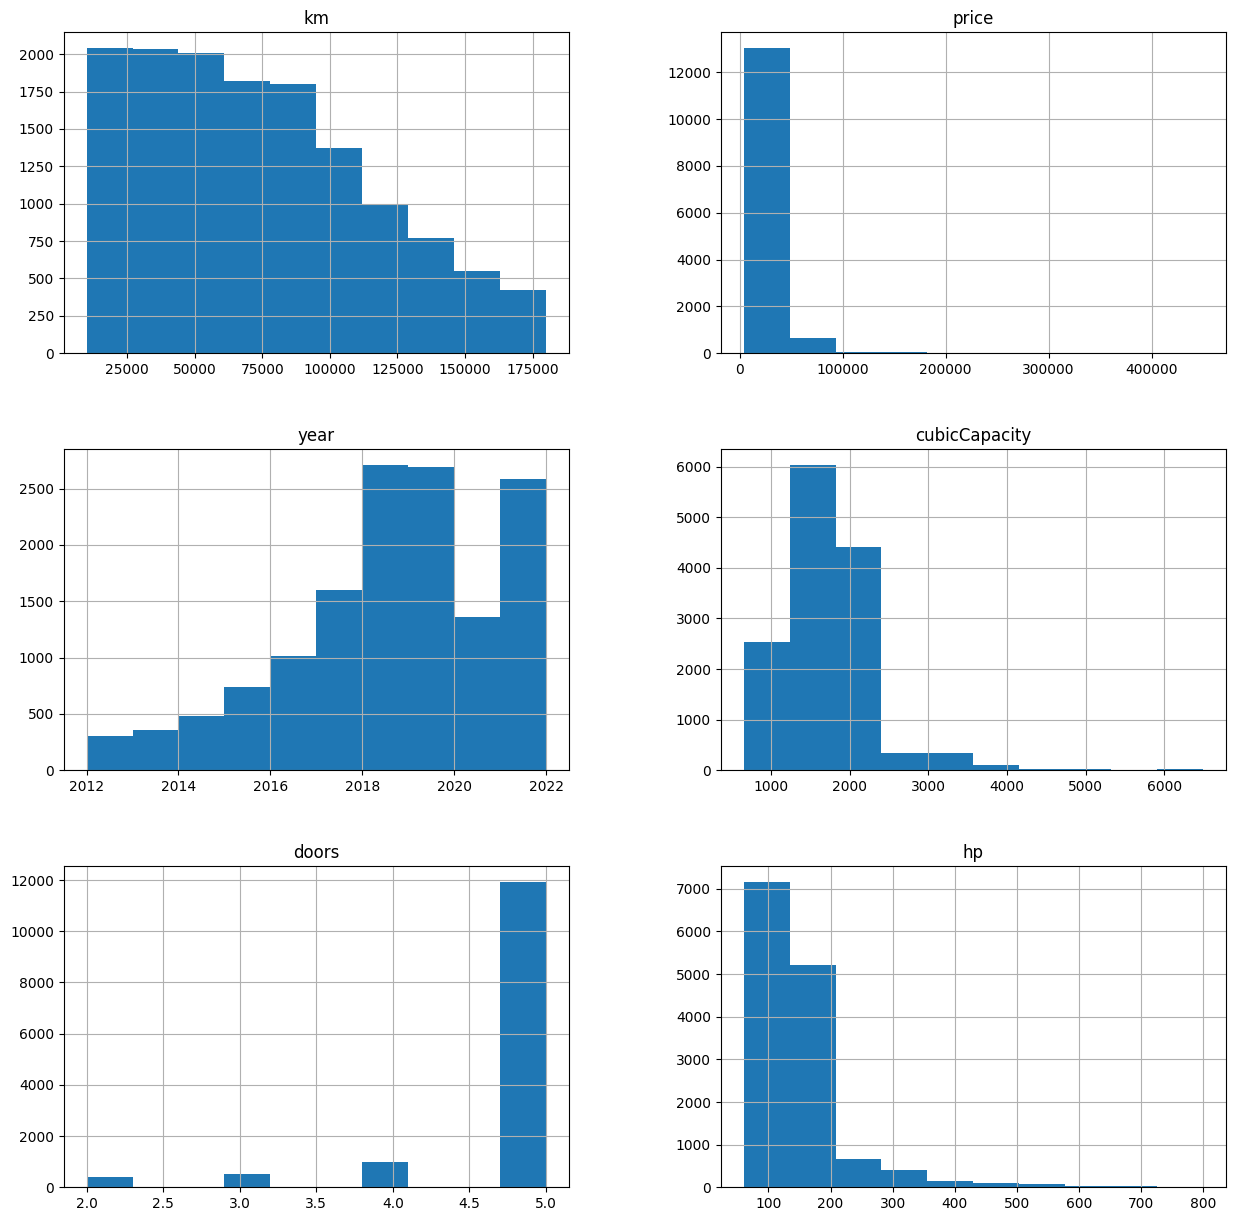

In [27]:
df[df.columns.tolist()].hist(ax = plt.figure(figsize = (15, 15)).gca())

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:#474646'` for same effect.
  warnings.warn(msg, FutureWarning)


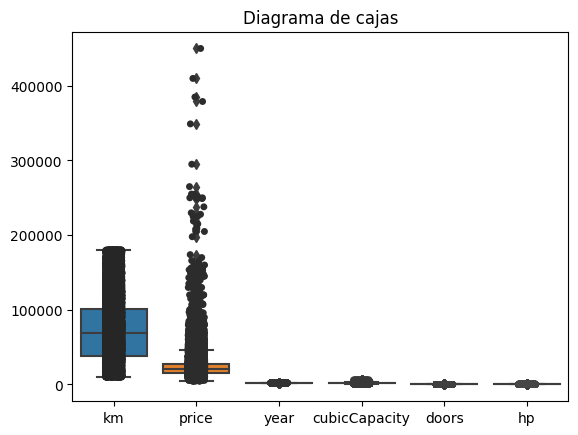

In [28]:
sns.boxplot(df)
sns.stripplot(df, color = '#474646')
plt.title('Diagrama de cajas')
plt.show()

# 5. Generar fichero json con df.

In [29]:
df.to_json('data.json', orient='table', index=True, indent=4)